In [1]:
import sys

sys.path += ['../src']

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

from features.frac_diff import _get_weights, frac_diff_fixed, run_adf_tests
from data_structures.bars import aggregate_time_bars
from data_structures.constants import TickCol, BarCol, StatsCol

## Fractionally Differentiated Features

In [3]:
def plot_weights(orders_range, num_plots, size, figsize=None):
    weight_sets = pd.DataFrame()
    for order in np.linspace(orders_range[0], orders_range[1], num_plots):
        weights = _get_weights(order, size=size)
        weights = pd.DataFrame(weights, index=range(weights.shape[0])[::-1], columns=[order])
        weight_sets = weight_sets.join(weights, how='outer')
    ax = weight_sets.plot(figsize=figsize)
    ax.legend(loc='upper right')
    plt.show()

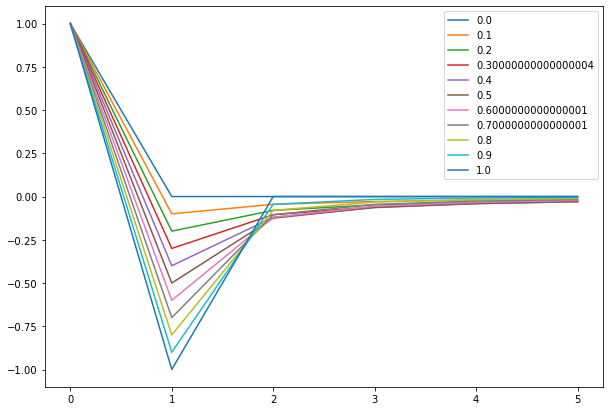

In [4]:
plot_weights([0, 1], 11, 6, figsize=(10, 7))

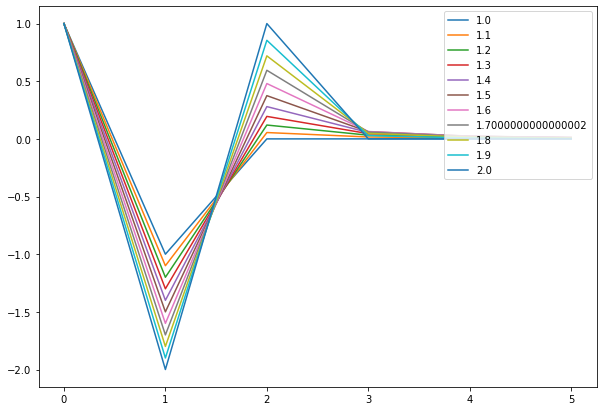

In [5]:
plot_weights([1, 2], 11, 6, figsize=(10, 7))

In [3]:
ticks = pd.read_csv('../data/trade_20220920.csv')
ticks = ticks[ticks['symbol'] == 'XBTUSD'][['timestamp', 'price', 'foreignNotional']]
ticks['timestamp'] = pd.to_datetime(ticks['timestamp'].str.slice(0, -3), format='%Y-%m-%dD%H:%M:%S.%f')
ticks = ticks.rename(columns={
    'timestamp': TickCol.TIMESTAMP,
    'price': TickCol.PRICE,
    'foreignNotional': TickCol.VOLUME,
})
ticks = ticks.reset_index(drop=True)
bars = aggregate_time_bars(ticks, '15min')

In [4]:
def plot_min_ffd(bars):
    adf_out = run_adf_tests(bars, BarCol.CLOSE)
    display(adf_out)
    adf_out[[StatsCol.STAT, StatsCol.CORR]].plot(secondary_y=StatsCol.STAT)
    plt.axhline(adf_out[StatsCol.CONF_95].mean(), linewidth=1, color='r', linestyle='dotted')

,Stat,pVal,Lag,nObs,95% Conf,Corr
0.0,-1.625230,4.699883e-01,1.0,94.0,-2.892815,1.000000
0.1,-2.010388,2.820371e-01,1.0,87.0,-2.895382,0.994308
0.2,-2.838133,5.302977e-02,1.0,84.0,-2.896616,0.960675
0.3,-3.626834,5.268262e-03,1.0,83.0,-2.897048,0.888416
0.4,-4.423127,2.700739e-04,1.0,84.0,-2.896616,0.793212
0.5,-5.186979,9.346484e-06,1.0,85.0,-2.896195,0.684382
0.6,-6.098908,9.944793e-08,1.0,86.0,-2.895784,0.561424
0.7,-6.870267,1.521977e-09,1.0,88.0,-2.894990,0.474649
0.8,-7.632310,1.993852e-11,1.0,89.0,-2.894607,0.370728
0.9,-8.443941,1.733090e-13,1.0,91.0,-2.893866,0.284865


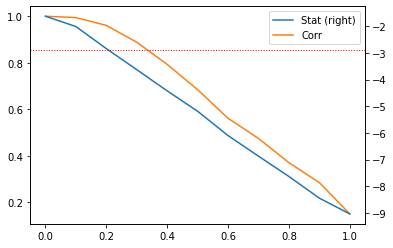

In [5]:
plot_min_ffd(bars)